In [68]:
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/klno/co2 --filename=out.log --output=../data/co2-klno.json
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/k-sos-mp2/co2 --filename=out.log --output=../data/co2-k-sos-mp2.json
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/ref-kpts/co2 --filename=out.log --output=../data/co2-ref-kpts.json

In [69]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{color}\usepackage{colortbl}"

from pathlib import Path

figpath = Path("/Users/yangjunjie/Desktop/fftisdf-embedding/fig/")
assert figpath.exists()

from matplotlib.colors import TABLEAU_COLORS
colors = list(TABLEAU_COLORS)

s = 4

style = {
    "hf": {
        "color": colors[0],
        "marker": "o",
        "linestyle": "-",
        "alpha": 1.0,
        "s": s,
    },
    "sos-mp2": {
        "color": colors[1],
        "marker": "s",
        "linestyle": "--",
        "alpha": 1.0,
        "s": s,
    },
    "mp2": {
        "color": colors[1],
        "marker": "o",
        "linestyle": "-",
        "alpha": 1.0,
        "s": s,
    },
    "ccsd": {
        "color": colors[3],
        "marker": "o",
        "linestyle": "-",
        "alpha": 1.0,
        "s": s,
    },
    "lno-mp2": {
        "color": colors[4],
        "marker": "o",
        "linestyle": "none",
        "s": s,
    },
    "lno-ccsd": {
        "color": colors[5],
        "marker": "o",
        "linestyle": "none",
        "s": s,
    },
}


In [70]:
import json, numpy
from matplotlib import pyplot as plt

data = {}

d1 = None
with open('../data/co2-k-sos-mp2.json', 'r') as f:
    d1 = json.load(f)
d1 = {"/".join(k.split("/")[-2:]): v for k, v in d1.items()}
for k, v in d1.items():
    print(k, v)

d2 = None
with open('../data/co2-ref-kpts.json', 'r') as f:
    d2 = json.load(f)
d2 = {"/".join(k.split("/")[-2:]): v for k, v in d2.items()}

for k1 in sorted([k for k, v in d1.items()]):
    v1 = d1[k1]
    kmesh = k1.split("/")[-2]

    ene_krhf = v1['ene_krhf']
    ene_krhf_ref = numpy.nan
    ene_os_ref = numpy.nan
    ene_mp2_ref = numpy.nan
    ene_corr_mp2_ref = numpy.nan
    ene_ccsd_ref = numpy.nan
    ene_corr_ccsd_ref = numpy.nan

    if k1 in d2:
        k2 = k1
        v2 = d2[k2]
                
        ene_krhf_ref = v2.get('ene_krhf', numpy.nan)
        ene_os_ref = v2.get('ene_corr_os', numpy.nan)
        ene_mp2_ref = v2.get('ene_kmp2', numpy.nan)
        ene_corr_mp2_ref = v2.get('ene_corr_kmp2', numpy.nan)
        ene_ccsd_ref = v2.get('ene_kccsd', numpy.nan)
        ene_corr_ccsd_ref = v2.get('ene_corr_kccsd', numpy.nan)

        print(ene_corr_ccsd_ref)
    
    out = ""
    ee = []
    for kk, vv in v1.items():
        if "ene_os" in kk:
            ee.append(vv)
            err = (vv - ene_os_ref) / v1['natm']
            out += "%s/%s ene_os = % 12.8f, err = % 6.2e\n" % (k1, kk, vv, err)

    if len(ee) < 3:
        continue

    ene_os_sol = ee[-1]
    err = (ene_os_sol - ene_os_ref) / v1['natm']
    out += "%s %s = % 12.8f, err = % 6.2e\n" % (k1[:-1], "ene_os", ene_os_sol, err)
    print(out)

    if "fftisdf-140-14" in k1:
        print(k1)
        data[kmesh] = {
            "ene_os": ene_os_sol,
            "ene_krhf": ene_krhf,
            "ene_kmp2": ene_mp2_ref,
            "ene_corr_mp2": ene_corr_mp2_ref,
            "ene_kccsd": ene_ccsd_ref,
            "ene_corr_ccsd": ene_corr_ccsd_ref,
        }

# print(len(data))

3-4-4/fftisdf-180-16 {'method': 'fftisdf-180-16', 'basis': 'cc-pvdz', 'natm': 12.0, 'nkpt': 48.0, 'nao': 156.0, 'time_build_df': 6.77, 'naux': 2496.0, 'time_krhf': 299.33, 'ene_krhf': -148.05960792, 'time_k_sos_lt20_mp2': 749.2, 'ene_k_sos_lt20_mp2': -149.84021494, 'ene_corr_k_sos_lt20_mp2': -1.78060702, 'ene_os_lt20': -1.36969771, 'time_k_sos_lt25_mp2': 1315.01, 'ene_k_sos_lt25_mp2': -149.83918126, 'ene_corr_k_sos_lt25_mp2': -1.77957335, 'ene_os_lt25': -1.36890258, 'time_k_sos_lt30_mp2': 1992.41, 'ene_k_sos_lt30_mp2': -149.83888148, 'ene_corr_k_sos_lt30_mp2': -1.77927357, 'ene_os_lt30': -1.36867197, 'time_k_sos_lt35_mp2': 2786.53, 'ene_k_sos_lt35_mp2': -149.83882477, 'ene_corr_k_sos_lt35_mp2': -1.77921685, 'ene_os_lt35': -1.36862834, 'time_k_sos_lt40_mp2': 3690.14, 'ene_k_sos_lt40_mp2': -149.83882268, 'ene_corr_k_sos_lt40_mp2': -1.77921477, 'ene_os_lt40': -1.36862674}
3-4-4/fftisdf-160-14 {'method': 'fftisdf-160-14', 'basis': 'cc-pvdz', 'natm': 12.0, 'nkpt': 48.0, 'nao': 156.0, 'time_

[-1.87033185 -1.87033185 -1.87033185 -1.87033185 -1.86960246 -1.86895818
 -1.86818973 -1.86717989 -1.86568973 -1.86382296 -1.86176952 -1.85944121
 -1.85603639 -1.8546981  -1.85259564 -1.85064887 -1.84900386 -1.83160862
 -1.79345363 -1.52891738 -0.71655172]
nk =   1, ene_krhf = -148.23787132, ene_sos_mp2 =  -1.74093754, ene_corr_mp2 =  -1.85196280, ene_corr_ccsd =  -1.87287884, ene_mp2 =  -1.85173432, err =  1.9040e-05
[-1.87060674 -1.86853888 -1.86585607 -1.86432146 -1.86270332 -1.86107115
 -1.85911159 -1.84334627 -1.80486996 -1.53962288 -0.72022385]
nk =   2, ene_krhf = -148.14659542, ene_sos_mp2 =  -1.75956374, ene_corr_mp2 =  -1.87369104, ene_corr_ccsd =  -1.88612613, ene_mp2 =  -1.87443502, err = -6.1998e-05
[-1.87434337 -1.87256498 -1.87034843 -1.86901016 -1.86771159 -1.86607672
 -1.86427953 -1.84943735 -1.81049068 -1.54482625 -0.72209986]
nk =   4, ene_krhf = -148.10062138, ene_sos_mp2 =  -1.76942728, ene_corr_mp2 =  -1.88542689, ene_corr_ccsd =  -1.89403162, ene_mp2 =  -1.886630

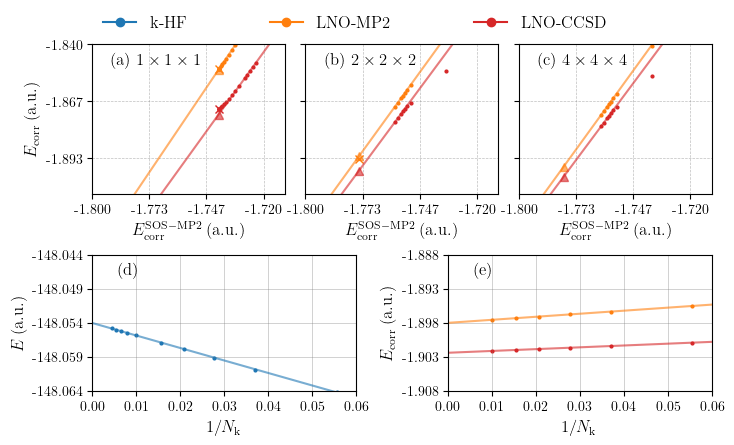

In [71]:
d = None
with open('../data/co2-klno.json', 'r') as f:
    d = json.load(f)

nx = 3
ny = 5

table = ""


l = ["1-1-1", "1-1-2", "1-2-2", "2-2-2", "2-3-3", "3-3-3"]
l += ["3-3-4", "3-4-4", "4-4-4", "4-5-5", "5-5-5"]
l += ["5-5-6", "5-6-6", "6-6-6"]

np = 1
# for ik, k1 in enumerate(sorted([k for k, v in data.items()])):

# 整个画布，适当加宽
fig = plt.figure(figsize=(8, 5))
fontsize = 12

# GridSpec: 3 行 6 列
#  - 上面三张：各占 2 列，行高较大（正方形为主）
#  - 下面两张：各占 3 列，行高较小（长条形）
from matplotlib import gridspec
gs = gridspec.GridSpec(
    3, 9, 
    height_ratios=[1, 0.1, 0.6],
)

# 上三图（正方形但更宽）
ax1 = fig.add_subplot(gs[0, 0:3])
ax2 = fig.add_subplot(gs[0, 3:6])
ax3 = fig.add_subplot(gs[0, 6:9])
for ax in [ax1, ax2, ax3]:
    ax.set_aspect('equal', 'box')  # 保持接近正方形

# 下两图（横向长条）
ax4 = fig.add_subplot(gs[2, 0:4])
ax5 = fig.add_subplot(gs[2, 5:9])

axs = [ax1, ax2, ax3, ax4, ax5]
ax_dict = {
    "1-1-1": ax1,
    "2-2-2": ax2,
    "4-4-4": ax3,
    "ehf-extrapolated": ax4,
    "e-corr-extrapolated": ax5,
}

for ik, k1 in enumerate(l):
    v1 = data.get(k1, None)
    if v1 is None:
        continue

    kk = [k for k, v in d.items() if k1 + "/fftisdf-140-14" in k]
    
    xx = [d[k]['ene_klno_corr_os']   for k in kk if 'ene_klno_corr_os' in d[k]]
    yy = [d[k]['ene_klno_corr_mp2']  for k in kk if 'ene_klno_corr_os' in d[k]]
    zz = [d[k]['ene_klno_corr_ccsd'] for k in kk if 'ene_klno_corr_os' in d[k]]

    assert len(xx) == len(yy) == len(zz)

    # coeff = 2.110590, intercept = 0.125943
    # fsos = lambda x: 1.3 * x # 2.110590 * x + 0.125943
    fsos = lambda x: 1.30 * x # + 0.29

    xx = fsos(numpy.array(xx))
    yy = numpy.array(yy)
    zz = numpy.array(zz)

    ene_mp2_sol = numpy.nan
    ene_mp2_ref = numpy.nan
    ene_ccsd_sol = numpy.nan
    ene_ccsd_ref = numpy.nan
    ene_sos_mp2 = fsos(v1['ene_os'])

    if len(xx) > 0:
        ax = ax_dict.get(k1, None)

        x = numpy.array(xx)
        y = numpy.array(yy)
        ix = numpy.argsort(x)

        x = x[ix][:6]
        y = y[ix][:6]

        r = numpy.polyfit(x, y, np)
        poly = numpy.poly1d(r)
        z = numpy.linspace(-4, 0.0, 100)

        ene_mp2_sol = poly(fsos(v1['ene_os']))
        ene_mp2_ref = v1['ene_corr_mp2']

        if ax is not None:
            s = style['mp2'].copy()
            ax.scatter(xx, yy, **s)
            s.pop("s")

            s['marker'] = ''
            s['alpha'] = 0.6
            ax.plot(z, poly(z), **s)
            
            s['marker'] = 'x'
            s['alpha'] = 1.0
            ax.plot(fsos(v1['ene_os']), ene_mp2_ref, **s)

            s['marker'] = '^'
            s['alpha'] = 0.6
            ax.plot(fsos(v1['ene_os']), ene_mp2_sol, **s)
        
        # err = ene_mp2_sol - ene_mp2_ref
        x = numpy.array(xx)
        y = numpy.array(zz)
        ix = numpy.argsort(x)
        print(zz[ix])

        if k1 == "1-1-1":
            x = x[ix][12:16]
            y = y[ix][12:16]
        else:
            x = x[ix][:4]
            y = y[ix][:4]

        r = numpy.polyfit(x, y, np)
        poly = numpy.poly1d(r)

        ene_ccsd_sol = poly(fsos(v1['ene_os']))
        ene_ccsd_ref = v1['ene_corr_ccsd']

        if ax is not None:
            s = style['ccsd'].copy()
            ax.scatter(xx, zz, **s)
            s.pop("s")

            s['marker'] = ''
            s['alpha'] = 0.6
            ax.plot(z, poly(z), **s)
            
            s['marker'] = 'x'
            s['alpha'] = 1.0
            ax.plot(fsos(v1['ene_os']), ene_ccsd_ref, **s)

            s['marker'] = '^'
            s['alpha'] = 0.6
            ax.plot(fsos(v1['ene_os']), ene_ccsd_sol, **s)

            ax.grid(
                color='grey',
                linestyle='--',
                linewidth=0.5,
                alpha=0.5
            )

            xmin = -1.80; xmax = -1.72; ymin = -1.92; ymax = -1.84
        
            ax.set_xticks(numpy.linspace(xmin, xmax, 4))
            ax.set_xticklabels(["% 6.3f" % x for x in numpy.linspace(xmin, xmax, 4)])
            ax.set_xlim(xmin, xmax + 0.01)
            
            ax.set_yticks(numpy.linspace(ymin, ymax, 4))
            ax.set_yticklabels(["% 6.3f" % y for y in numpy.linspace(ymin, ymax, 4)])
            ax.set_ylim(ymin + 0.01, ymax + 0.0)
            ax.set_aspect('equal')

            ax.set_xlabel(r"$E_{\mathrm{corr}}^{\mathrm{SOS-MP2}} \; (\mathrm{a.u.})$", fontsize=fontsize)
            ax.set_ylabel(r"$E_{\mathrm{corr}} \; (\mathrm{a.u.})$", fontsize=fontsize)

            text = "(%s)" % ("abcd"[axs.index(ax)])
            text += r"  $%s$" % (k1.replace("-", r"\times"))
            ax.text(0.1, 0.95, text, transform=ax.transAxes, ha='left', va='top', fontsize=fontsize)

            ix = axs.index(ax)
            if ix in [1, 2]:
                # turn off the y-axis
                # ax.set_yticks([])
                ax.set_yticklabels([])
                ax.set_ylabel("")

    nk = numpy.prod(numpy.array([int(k) for k in k1.split("-")]))
    ene_krhf_tot = data[k1]['ene_krhf']
    ene_kmp2_tot_ref = data[k1]['ene_kmp2']
    ene_kmp2_tot_sol = ene_krhf_tot + ene_mp2_sol
    ene_ccsd_tot = ene_krhf_tot + ene_ccsd_sol
    ene_sos_mp2_tot = ene_krhf_tot + fsos(v1['ene_os'])
    
    out = "nk = %3d, ene_krhf = % 12.8f, ene_sos_mp2 = % 12.8f, " % (nk, ene_krhf_tot, fsos(v1['ene_os']))
    out += "ene_corr_mp2 = % 12.8f, " % (ene_kmp2_tot_sol - ene_krhf_tot)
    out += "ene_corr_ccsd = % 12.8f" % (ene_ccsd_tot - ene_krhf_tot)

    ene_kccsd_ref = data[k1]['ene_kccsd']
    ene_corr_ccsd_ref = data[k1]['ene_corr_ccsd']
    # # print(data[k1])
    if ene_mp2_ref is not numpy.nan:
        out += ", ene_mp2 = % 12.8f" % (ene_mp2_ref)

        ene_corr_mp2_sol = ene_kmp2_tot_sol - ene_krhf_tot
        ene_corr_mp2_ref = ene_mp2_ref
        err = ene_corr_mp2_ref - ene_corr_mp2_sol
        out += ", err = % 6.4e" % (err / 12)

    # if ene_ccsd_ref is not numpy.nan:
    #     out += ", ene_corr_ccsd = % 12.8f" % (ene_corr_ccsd_ref)
    table += out + "\n"
    print(out)

data = table.split("\n")
data = [d.split() for d in data if len(d) > 1]
nk = [int(d[2][:-1]) for d in data]
ene_krhf    = numpy.array([float(d[5].replace(",", "")) for d in data]) 
ene_sos_mp2 = numpy.array([float(d[8].replace(",", "")) for d in data])
ene_mp2     = numpy.array([float(d[11].replace(",", "")) for d in data])
ene_ccsd    = numpy.array([float(d[14].replace(",", "")) for d in data])

# ene_sos_mp2 = ene_sos_mp2 - ene_krhf
# ene_mp2 = ene_mp2 - ene_krhf
# ene_ccsd = ene_ccsd - ene_krhf

out = "     TDL, "

ix = [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10]
z = numpy.linspace(0, 1.0, 100)
nk = numpy.array(nk)
x = 1 / nk

ax = ax4
y = numpy.array(ene_krhf)
r = numpy.polyfit(x[ix], y[ix], 1)
poly = numpy.poly1d(r)
out += "ene_krhf = % 12.8f, " % (r[1])

s = style['hf'].copy()
ax.scatter(x, y, **s)
s.pop("s")

s['alpha'] = 1.0
s['label'] = 'k-HF'
s['marker'] = 'o'
l1 = ax.plot(z, poly(z) + 1000, **s)

s['alpha'] = 0.6
s['marker'] = ''
ax.plot(z, poly(z), **s)

ymin = r[1] - 1e-2
ymax = r[1] + 1e-2
ax.set_ylim(ymin, ymax)
yy = numpy.linspace(ymin, ymax, 5)
ax.set_yticks(yy)
ax.set_yticklabels(["% 6.3f" % y for y in yy])

ax.text(0.1, 0.95, "(d)", transform=ax.transAxes, ha='left', va='top', fontsize=fontsize)
ax.grid(
    color='grey',
    linestyle='-',
    linewidth=0.5,
    alpha=0.5
)
ax.set_ylabel(r"$E \; (\mathrm{a.u.})$", fontsize=fontsize)
ax.set_xlabel(r"$1 / N_{\mathrm{k}}$", fontsize=fontsize)
# ax.set_ylim(-149.83541305, -149.83471478)
ax.set_xlim(0.0, 0.06)

# ax = ax5
y = ene_sos_mp2
y = numpy.array(ene_sos_mp2)
r = numpy.polyfit(x[ix], y[ix], 1)
poly = numpy.poly1d(r)
out += "ene_sos_mp2 = % 12.8f, " % (r[1])
# s = style['sos-mp2'].copy()
# # s['label'] = 'LNO-MP2'
# ax.scatter(x, y, **s)
# # assert 1 == 2
# s['marker'] = ''
# s['alpha'] = 0.6
# ax.plot(z, poly(z), **s)
# # ax.set_ylim(r[1] - 1e-2, r[1] + 1e-2)

ax = ax5
y = numpy.array(ene_mp2)
xy = [(x[i], y[i]) for i in ix if not numpy.isnan(x[i]) and not numpy.isnan(y[i])]
xy = numpy.array(xy)
r = numpy.polyfit(xy[:, 0], xy[:, 1], 1)
out += "ene_corr_mp2 = % 12.8f, " % (r[1])

poly = numpy.poly1d(r)
s = style['mp2'].copy()

ax.scatter(x, y, **s)
s.pop("s")

s['marker'] = ''
s['alpha'] = 0.6
ax.plot(z, poly(z), **s)

s['label'] = 'LNO-MP2'
s['marker'] = 'o'
s['alpha'] = 1.0
l2 = ax.plot(z, poly(z) + 1000, **s)

# ax.set_ylim(r[1] - 1e-2, r[1] + 1e-2)
ax.text(0.1, 0.95, "(e)", transform=ax.transAxes, ha='left', va='top', fontsize=fontsize)
ax.grid(
    color='grey',
    linestyle='-',
    linewidth=0.5,
    alpha=0.5
)
ax.set_ylabel(r"$E_{\mathrm{corr}} \; (\mathrm{a.u.})$", fontsize=fontsize)
ax.set_xlabel(r"$1 / N_{\mathrm{k}}$", fontsize=fontsize)

ymin = r[1] - 1e-2; ymax = r[1] + 1e-2
ax.set_ylim(ymin, ymax)
yy = numpy.linspace(ymin, ymax, 5)
ax.set_yticks(yy)
ax.set_yticklabels(["% 6.3f" % y for y in yy])

ax.set_xlim(0.0, 0.06)

# # ax = axs[1, 1]
y = numpy.array(ene_ccsd)
# y[8] = numpy.nan
# print(y)
xy = [(x[i], y[i]) for i in ix if not numpy.isnan(x[i]) and not numpy.isnan(y[i])]
xy = numpy.array(xy)
r = numpy.polyfit(xy[:, 0], xy[:, 1], 1)
out += "ene_corr_ccsd = % 12.8f, " % (r[1])
# # print(r)

poly = numpy.poly1d(r)
s = style['ccsd'].copy()

ax.scatter(x, y, **s)
s.pop("s")

s['marker'] = ''
s['alpha'] = 0.6
ax.plot(z, poly(z), **s)

s['label'] = 'LNO-CCSD'
s['marker'] = 'o'
s['alpha'] = 1.0
l3 = ax.plot(z, poly(z) + 1000, **s)

# ax.set_ylim(r[1] - 1e-2, r[1] + 1e-2)
# # ax.text(0.1, 0.9, "LNO-CCSD", transform=ax.transAxes, ha='left', va='top', fontsize=12)
# # ax.grid(
# #     color='grey',
# #     linestyle='-',
# #     linewidth=0.5,
# #     alpha=0.5
# # )
# # ax.set_ylabel("Energy (a.u.)")
# # ax.set_xlabel(r"$1 / N_{\mathrm{k}}$")

# # ax.set_ylim(-5.7, -5.5)
# ax.set_xlim(0.0, 0.06)

# fig.tight_layout()

# print(ene_krhf)
# print(ene_sos_mp2 - ene_krhf)
print(out)

fig.legend(
    handles=[l1[0], l2[0], l3[0]],
    # ['k-HF', 'LNO-MP2', 'LNO-CCSD'],
    loc='lower left',
    bbox_to_anchor=(0.12, 0.8),
    ncol=3, columnspacing=5,
    fontsize=fontsize,
    frameon=False,
)

plt.subplots_adjust(
    hspace=0.0,
    wspace=0.4,
)

fig.savefig(
    figpath / "co2-extrapolate.pdf",
    bbox_inches="tight", dpi=300
)

[  -0.18413389 -148.05426247]
[ 0.03734807 -1.77967685]
[ 0.04345458 -1.89782973]
[ 0.02677681 -1.90206516]
[-148.14659542 -148.10062138 -148.0778358  -148.06442375 -148.06113188
 -148.05941384 -148.0581352  -148.05718344 -148.05611033 -148.05573375
 -148.0554689  -148.05524978 -148.05506876]
[146.38703168 146.3311941  146.30281984 146.28683464 146.28282596
 146.28076778 146.27923183 146.27808607 146.27680761 146.27635713
 146.27604407 146.27578478 146.27557013]


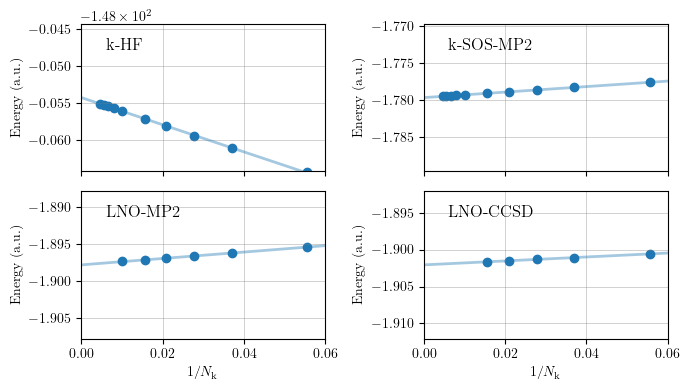

In [72]:
data = """
nk =   2, ene_krhf = -148.14659542, ene_sos_mp2 = -149.90615916, ene_corr_mp2 =  -1.87386826, ene_corr_ccsd =  -1.88608481, ene_mp2 =  -1.87443502, err = -4.7230e-05
nk =   4, ene_krhf = -148.10062138, ene_sos_mp2 = -149.87004866, ene_corr_mp2 =  -1.88553759, ene_corr_ccsd =  -1.89397508, ene_mp2 =  -1.88663067, err = -9.1090e-05
nk =   8, ene_krhf = -148.07783580, ene_sos_mp2 = -149.85285176, ene_corr_mp2 =  -1.89234400, ene_corr_ccsd =  -1.89885882, ene_mp2 =  -1.89376714, err = -1.1860e-04
nk =  18, ene_krhf = -148.06442375, ene_sos_mp2 = -149.84201286, ene_corr_mp2 =  -1.89538198, ene_corr_ccsd =  -1.90057020
nk =  27, ene_krhf = -148.06113188, ene_sos_mp2 = -149.83943780, ene_corr_mp2 =  -1.89624264, ene_corr_ccsd =  -1.90108840
nk =  36, ene_krhf = -148.05941384, ene_sos_mp2 = -149.83805990, ene_corr_mp2 =  -1.89664664, ene_corr_ccsd =  -1.90132142
nk =  48, ene_krhf = -148.05813520, ene_sos_mp2 = -149.83703857, ene_corr_mp2 =  -1.89695312, ene_corr_ccsd =  -1.90150204
nk =  64, ene_krhf = -148.05718344, ene_sos_mp2 = -149.83628081, ene_corr_mp2 =  -1.89718450, ene_corr_ccsd =  -1.90164437
nk = 100, ene_krhf = -148.05611033, ene_sos_mp2 = -149.83541305, ene_corr_mp2 =  -1.89732003, ene_corr_ccsd =          nan
nk = 125, ene_krhf = -148.05573375, ene_sos_mp2 = -149.83511037, ene_corr_mp2 =          nan, ene_corr_ccsd =          nan
nk = 150, ene_krhf = -148.05546890, ene_sos_mp2 = -149.83489373, ene_corr_mp2 =          nan, ene_corr_ccsd =          nan
nk = 180, ene_krhf = -148.05524978, ene_sos_mp2 = -149.83471478, ene_corr_mp2 =          nan, ene_corr_ccsd =          nan
nk = 216, ene_krhf = -148.05506876, ene_sos_mp2 = -149.83456739, ene_corr_mp2 =          nan, ene_corr_ccsd =          nan
"""

data = data.split("\n")
data = [d.split() for d in data if len(d) > 1]
nk = [int(d[2][:-1]) for d in data]
ene_krhf    = numpy.array([float(d[5].replace(",", "")) for d in data]) 
ene_sos_mp2 = numpy.array([float(d[8].replace(",", "")) for d in data])
ene_mp2     = numpy.array([float(d[11].replace(",", "")) for d in data])
ene_ccsd    = numpy.array([float(d[14].replace(",", "")) for d in data])

ene_sos_mp2 = ene_sos_mp2 - ene_krhf
# ene_mp2 = ene_mp2 - ene_krhf
# ene_ccsd = ene_ccsd - ene_krhf

ix = [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10]
z = numpy.linspace(0, 1.0, 100)
nk = numpy.array(nk)
x = 1 / nk

fig, axs = plt.subplots(2, 2, figsize=(7, 4), sharex=True)

ax = axs[0, 0]
y = numpy.array(ene_krhf)
r = numpy.polyfit(x[ix], y[ix], 1)
print(r)
poly = numpy.poly1d(r)
ax.plot(z, poly(z), label='HF fit', linewidth=2, alpha=0.4)
ax.scatter(x, y, label='HF')
ax.set_ylim(r[1] - 1e-2, r[1] + 1e-2)
ax.text(0.1, 0.9, "k-HF", transform=ax.transAxes, ha='left', va='top', fontsize=12)
ax.grid(
    color='grey',
    linestyle='-',
    linewidth=0.5,
    alpha=0.5
)
ax.set_ylabel("Energy (a.u.)")

ax = axs[0, 1]
y = numpy.array(ene_sos_mp2)
r = numpy.polyfit(x[ix], y[ix], 1)
print(r)
poly = numpy.poly1d(r)
ax.plot(z, poly(z), label='MP2 fit', linewidth=2, alpha=0.4)
ax.scatter(x, y, label='MP2')
ax.set_ylim(r[1] - 1e-2, r[1] + 1e-2)
ax.text(0.1, 0.9, "k-SOS-MP2", transform=ax.transAxes, ha='left', va='top', fontsize=12)
ax.grid(
    color='grey',
    linestyle='-',
    linewidth=0.5,
    alpha=0.5
)
ax.set_ylabel("Energy (a.u.)")

ax = axs[1, 0]
y = numpy.array(ene_mp2)
xy = [(x[i], y[i]) for i in ix if not numpy.isnan(x[i]) and not numpy.isnan(y[i])]
xy = numpy.array(xy)
r = numpy.polyfit(xy[:, 0], xy[:, 1], 1)
print(r)

poly = numpy.poly1d(r)
ax.plot(z, poly(z), label='MP2 fit', linewidth=2, alpha=0.4)
ax.scatter(x, y, label='MP2')
ax.set_ylim(r[1] - 1e-2, r[1] + 1e-2)
ax.text(0.1, 0.9, "LNO-MP2", transform=ax.transAxes, ha='left', va='top', fontsize=12)
ax.grid(
    color='grey',
    linestyle='-',
    linewidth=0.5,
    alpha=0.5
)
ax.set_ylabel("Energy (a.u.)")
ax.set_xlabel(r"$1 / N_{\mathrm{k}}$")

ax = axs[1, 1]
y = numpy.array(ene_ccsd)
xy = [(x[i], y[i]) for i in ix if not numpy.isnan(x[i]) and not numpy.isnan(y[i])]
xy = numpy.array(xy)
r = numpy.polyfit(xy[:, 0], xy[:, 1], 1)
print(r)

poly = numpy.poly1d(r)
ax.plot(z, poly(z), label='CCSD fit', linewidth=2, alpha=0.4)
ax.scatter(x, y, label='CCSD')
ax.set_ylim(r[1] - 1e-2, r[1] + 1e-2)
ax.text(0.1, 0.9, "LNO-CCSD", transform=ax.transAxes, ha='left', va='top', fontsize=12)
ax.grid(
    color='grey',
    linestyle='-',
    linewidth=0.5,
    alpha=0.5
)
ax.set_ylabel("Energy (a.u.)")
ax.set_xlabel(r"$1 / N_{\mathrm{k}}$")

# ax.set_ylim(-5.7, -5.5)
ax.set_xlim(0.0, 0.06)

fig.tight_layout()

print(ene_krhf)
print(ene_sos_mp2 - ene_krhf)